# DESAFIO 3: Estructurando un Proyecto de DS (parte I)

## DATASET: COVID 19 Progreso mundial de vacunación

El set de datos incluye información acerca de las vacunaciones por COVID desde Diciembre de 2020 a Marzo de 2022. Se analizó la relación que existen entre el País, fecha, cantidad de personas vacunadas, vacunaciones diarias, personas con esquema completo.

Concluyendo que...


Este conjunto de datos brinda la oportunidad de hacer preguntas como:
* ¿Qué vacuna utiliza cada país?
* ¿En qué país el programa de vacunación está más avanzado?
* ¿Dónde se vacunan más personas por día?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
mpl.style.use('bmh')

In [2]:
data = pd.read_csv('../datasets/covid_vaccinations/country_vaccinations.csv')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
std,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000


In [4]:
data.describe(include=object)

,country,iso_code,date,vaccines,source_name,source_website
count,86512,86512,86512,86512,86512,86512
unique,223,223,483,84,81,119
top,Norway,NOR,2021-08-19,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/
freq,482,482,220,7608,26822,25951


De las tablas anteriores podemos concluir que:
1. Se analizaron 223 paises y hay un total de 483 días analizados
2. El total de vacunaciones va entre 0 (posibles valores nulos) y 3263129000, siendo la media de 3590096
3. Las personas vacunadas entre 0 (posibles valores nulos) y 1275541000, siendo la media de 2187310
4. Las vacunaciones diarias entre 0 (posibles valores nulos) y 22424290, siendo la media de 7343.

In [5]:
data.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

Acá podemos ver que hay muchos valores vacios, y hay que tratarlos antes de analizar la información.

## Verificación de datos nulos

Para el correcto tratamiento de los datos se verificarán los casos en los que sucedieron, ya que pueden existir casos que son anormales pero existentes, por ejemplo, 0 total de vacunaciones.

En este caso creo que es posible que los valores sean nulos, ya que el dataset esta separado por días y en esos casos puede haberse no llevado a cabo la vacunación o dejarse vacio.

## Exploración de datos

### Qué paises son considerados en el análisis?

In [20]:
temp = data['country'].value_counts().head(15)
temp

Norway           482
Latvia           480
Denmark          476
United States    471
Russia           470
Canada           470
China            470
Israel           466
Qatar            463
Liechtenstein    463
Switzerland      463
Mexico           461
Costa Rica       460
Germany          458
Slovenia         458
Name: country, dtype: int64

<AxesSubplot:>

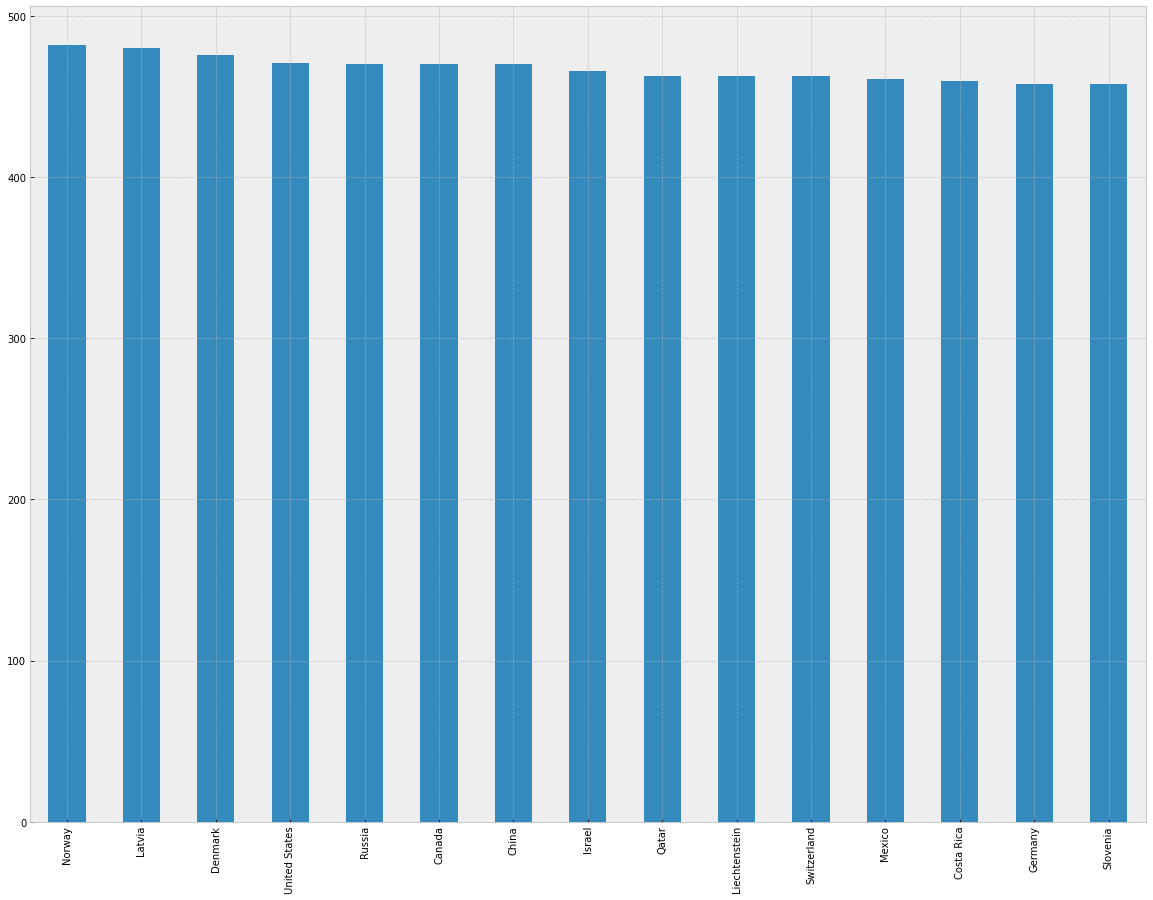

In [21]:
temp.plot.bar(figsize=(20, 15))

- Se muestra los 15 paises con mayor cantidad de datos
- El comporamiento de los datos es diferente para cada país
- Hay que tener en cuenta la cantidad de personas de cada país para comparar con los datos.

### En que periodos tenemos más datos?

In [15]:
data['date'] = pd.to_datetime(data.date)
data['year'] = data.date.dt.year
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021


<AxesSubplot:>

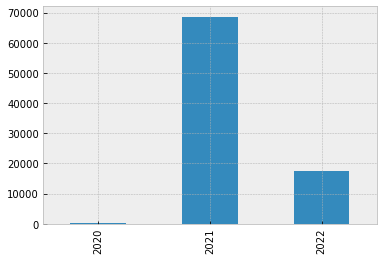

In [19]:
temp = data['year'].value_counts()
temp.sort_index(inplace=True)
temp.plot.bar()

- Se puede ver que hay mayor densidad de datos en el año 2021.

# Modelo de regresión

## MODELO 1: Personas vacunadas contra Total de vacunaciones

In [6]:
model1 = 'total_vaccinations~people_vaccinated'
lm1 = sm.ols(formula=model1, data=data).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_vaccinations   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.204e+06
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:07:41   Log-Likelihood:            -7.5142e+05
No. Observations:               40890   AIC:                         1.503e+06
Df Residuals:                   40888   BIC:                         1.503e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.948e+05   1.18e+05      7.583      0.000    6.64e+05    1.13e+06
people_vaccinated     1.7715      0.002   1097.193      0.000       1.768       1.775
==============================================================================
Omnibus:                    72865.703   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        637137060.467
Skew:                          12.067   Prob(JB):                         0.00
Kurtosis:                     614.048   Cond. No.                     7.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### INTERPRETACION

* El coeficiente significa que si las personas vacunadas aumentan, se espera que el total de vacunaciones aumente 1.7715 más.
* Coeficiente R2: 0.967 es bueno, significa que el 96,7% de la variabilidad es explicada por el modelo lineal.

## MODELO 2: Personas vacunadas y Personas vacunadas con esquema completo (2 vacunas) contra Total de vacunaciones

In [7]:
modelo2 = 'total_vaccinations~people_vaccinated+people_fully_vaccinated'
lm2 = sm.ols(formula=modelo2, data=data).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_vaccinations   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.173e+06
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:07:41   Log-Likelihood:            -6.5720e+05
No. Observations:               37436   AIC:                         1.314e+06
Df Residuals:                   37433   BIC:                         1.314e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3.336e+05   5.44e+04      6.134      0.000    2.27e+05     4.4e+05
people_vaccinated           0.7893      0.002    319.693      0.000       0.784       0.794
people_fully_vaccinated     1.4023      0.003    415.679      0.000       1.396       1.409
==============================================================================
Omnibus:                    77291.319   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        988147573.262
Skew:                          16.977   Prob(JB):                         0.00
Kurtosis:                     798.200   Cond. No.                     9.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### INTERPRETACION

* El coeficiente de people_vaccinated se interpreta de la siguiente manera: para personas vacunadas con esquema completo, en promedio, las personas vacunadas son 0.7893 más.
* El coeficiente de people_fully_vaccinated significa que si las personas vacunadas con esquema completo aumentan, se espera que el total de vacunaciones aumente 1.4023 más.
* Coeficiente R2: 0.994 es bueno, significa que el 99,4% de la variabilidad es explicada por el modelo lineal.

## MODELO 3: Vacunaciones diaras contra Total de vacunaciones

In [8]:
modelo3 = 'total_vaccinations~daily_vaccinations'
lm3 = sm.ols(formula=modelo3, data=data).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_vaccinations   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 3.910e+04
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:07:41   Log-Likelihood:            -8.8199e+05
No. Observations:               43384   AIC:                         1.764e+06
Df Residuals:                   43382   BIC:                         1.764e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             1.3e+07   8.02e+05     16.216      0.000    1.14e+07    1.46e+07
daily_vaccinations   145.5426      0.736    197.734      0.000     144.100     146.985
==============================================================================
Omnibus:                    58278.039   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33871322.487
Skew:                           7.338   Prob(JB):                         0.00
Kurtosis:                     139.096   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### INTERPRETACION

Este modelo no es tan bueno ya que el Coeficiente R2: 0.474 es bajo, significa que el 47,4% de la variabilidad es explicada por el modelo lineal.

## MODELO 4: Vacunaciones diarias, personas vacunadas y personas vacunadas con esquema completo contra Total de vacunaciones

In [9]:
modelo4 = 'total_vaccinations~daily_vaccinations+people_vaccinated+people_fully_vaccinated'
lm4 = sm.ols(formula=modelo4, data=data).fit()

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_vaccinations   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.127e+06
Date:                Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:07:41   Log-Likelihood:            -6.5658e+05
No. Observations:               37406   AIC:                         1.313e+06
Df Residuals:                   37402   BIC:                         1.313e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.546e+05   5.55e+04      2.782      0.005    4.57e+04    2.63e+05
daily_vaccinations          3.3932      0.225     15.109      0.000       2.953       3.833
people_vaccinated           0.7324      0.004    162.903      0.000       0.724       0.741
people_fully_vaccinated     1.4509      0.005    311.462      0.000       1.442       1.460
==============================================================================
Omnibus:                    76886.122   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        942809830.188
Skew:                          16.812   Prob(JB):                         0.00
Kurtosis:                     780.035   Cond. No.                     9.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### INTERPRETACION

Al agregar una tercer variable al modelo, no varia ya que el Coeficiente R2: 0.994 se mantiene igual.